In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [2]:

# Load the CSV data into a pandas DataFrame
df = pd.read_csv(r"D:\POI data\729_acc\729reclass3_add_distanceToCenter.csv")

# Display the first few rows of the DataFrame to get a sense of the data
df.describe()


,price,bedrooms,bathrooms,size_square_meters,lat,lon,Price_per_square_meter,garden,AccommodationAccess15m,AirportsAccess15m,...,CultureAccess15m,EntertainmentAccess15m,GamblingAccess15m,Green parkAccess15m,Public infrastructureAccess15m,Railway stationsAccess15m,SportsAccess15m,TourismAccess15m,Underground entranceAccess15m,distance_to_center
count,3.737000e+03,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,...,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000
mean,1.452387e+06,3.162430,2.009366,139.744180,51.514109,-0.142444,9670.434003,0.600214,9.641691,0.027562,...,7.222906,13.257158,5.146107,6.442869,108.002408,1.023816,12.125769,17.777629,5.476318,9.928393
std,2.007562e+06,1.422367,1.101473,103.311608,0.064743,0.123795,5502.842953,0.489920,20.994654,0.252483,...,14.192555,29.860686,5.878777,7.378677,109.427913,1.607071,11.792311,40.743446,12.497068,5.360640
min,1.250000e+05,1.000000,1.000000,29.000000,51.305150,-0.493988,530.421217,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093446
25%,6.000000e+05,2.000000,1.000000,79.000000,51.477683,-0.219136,6164.383562,0.000000,1.000000,0.000000,...,1.000000,2.000000,1.000000,2.000000,49.000000,0.000000,5.000000,1.000000,0.000000,5.424218
50%,8.500000e+05,3.000000,2.000000,109.000000,51.512508,-0.149696,8078.994614,1.000000,2.000000,0.000000,...,3.000000,5.000000,4.000000,4.000000,80.000000,1.000000,9.000000,4.000000,1.000000,9.306277
75%,1.495000e+06,4.000000,2.000000,164.000000,51.558576,-0.058598,11176.470590,1.000000,7.000000,0.000000,...,7.000000,12.000000,7.000000,9.000000,127.000000,1.000000,15.000000,13.000000,5.000000,14.116699
max,3.250000e+07,17.000000,12.000000,987.000000,51.681156,0.266392,47677.261610,1.000000,187.000000,4.000000,...,180.000000,335.000000,53.000000,77.000000,1234.000000,13.000000,123.000000,444.000000,120.000000,28.134261


我想知道df的property_type列有多少类型，每个类型有多少条数据。

In [3]:
# 统计property_type列中每个类型的数量
property_type_counts = df['property_type'].value_counts()

# 输出每个类型的数量
property_type_counts


property_type
Flat                            1045
Apartment                        608
Terraced                         580
Semi-Detached                    462
House                            293
Detached                         275
End of Terrace                   150
Maisonette                       106
Penthouse                         62
Town House                        38
Mews                              25
Ground Flat                       22
Duplex                            14
Bungalow                           9
Detached Bungalow                  9
Retirement Property                9
Link Detached House                7
Semi-Detached Bungalow             7
Ground Maisonette                  7
House Boat                         2
House of Multiple Occupation       2
Block of Apartments                2
Cottage                            1
Character Property                 1
Serviced Apartments                1
Name: count, dtype: int64

我想知道每个borough有多少行数据，平均单价Price_per_square_meter是多少

In [59]:
# Group the data by borough, calculate the count of rows and the average price per square meter for each borough
borough_stats = df.groupby('borough').agg({'borough': 'count', 'Price_per_square_meter': 'mean'}).rename(columns={'borough': 'count'})

# Sort the DataFrame by count in descending order
borough_stats.sort_values(by='count', ascending=False, inplace=True)

borough_stats


,count,Price_per_square_meter
borough,,
Kensington and Chelsea,234,21864.482618
Westminster,215,16391.010935
Brent,193,7604.706255
Camden,177,12994.723529
Hounslow,176,6998.837135
Barnet,173,8527.171182
Waltham Forest,166,5903.946928
Harrow,158,6497.734589
Tower Hamlets,157,10275.194546


In [60]:

# Define predictors and target variable
X = df[['AccommodationAccess15m', 'AirportsAccess15m',
            'Culture and tourismAccess15m', 'Eating and drinkingAccess15m',
            'EducationAccess15m', 'EntertainmentAccess15m', 'HealthAccess15m',
            'Infrastructure and facilitiesAccess15m',
            'Manufacturing and productionAccess15m', 'OfficeAccess15m',
            'Public transportAccess15m', 'Road and railAccess15m',
            'ServiceAccess15m', 'ShoppingAccess15m', 'Water transportAccess15m']]
y = df['Price_per_square_meter']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print coefficients
print("Coefficients: ", model.coef_)

# Print R^2 score
print("R^2 score: ", r2_score(y_test, y_pred))


Coefficients:  [ 38.31578255 612.2088428   45.61514613  -5.89008307  63.99316136
 -52.40737093   6.45112787 -20.32089065 -33.31696868  50.95862787
  -2.8754203  -30.80394075  -2.22531283  21.51127751  61.93869614]
R^2 score:  0.3263102517705937


In [61]:


df_balanced = pd.read_csv(r"D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_balanced.csv")
# Group the data by borough, calculate the count of rows and the average price per square meter for each borough
borough_stats = df_balanced.groupby('borough').agg({'borough': 'count', 'Price_per_square_meter': 'mean'}).rename(columns={'borough': 'count'})

# Sort the DataFrame by count in descending order
borough_stats.sort_values(by='count', ascending=False, inplace=True)

borough_stats


,count,Price_per_square_meter
borough,,
Barking and Dagenham,17,5260.517463
Hounslow,17,9160.314892
Wandsworth,17,13766.724684
Waltham Forest,17,5764.877466
Tower Hamlets,17,12492.720206
Sutton,17,5303.671463
Southwark,17,13508.442159
Richmond upon Thames,17,11604.101901
Redbridge,17,6314.882443


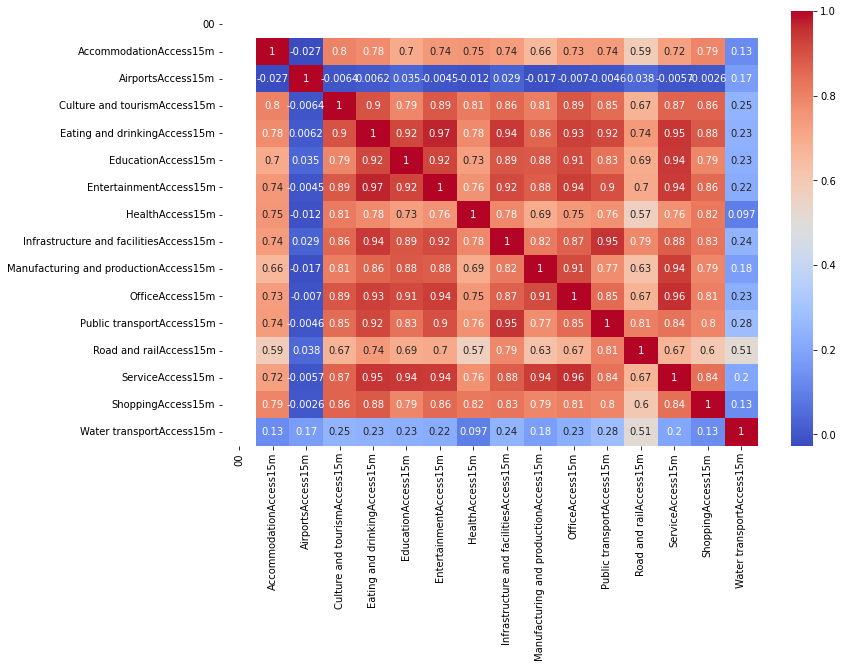

In [62]:

# Define predictors and target variable
X = df_balanced[['AccommodationAccess15m', 'AirportsAccess15m',
            'Culture and tourismAccess15m', 'Eating and drinkingAccess15m',
            'EducationAccess15m', 'EntertainmentAccess15m', 'HealthAccess15m',
            'Infrastructure and facilitiesAccess15m',
            'Manufacturing and productionAccess15m', 'OfficeAccess15m',
            'Public transportAccess15m', 'Road and railAccess15m',
            'ServiceAccess15m', 'ShoppingAccess15m', 'Water transportAccess15m']]
y = df_balanced['Price_per_square_meter']

# Add a constant to the predictors
X = pd.concat([pd.Series(1, index=X.index, name='00'), X], axis=1)

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



In [63]:

# Calculate and print VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


                                 variables        VIF
0                                       00   3.974129
1                   AccommodationAccess15m   3.537473
2                        AirportsAccess15m   1.067393
3             Culture and tourismAccess15m  10.704942
4             Eating and drinkingAccess15m  40.578504
5                       EducationAccess15m  14.893225
6                   EntertainmentAccess15m  22.849803
7                          HealthAccess15m   4.366756
8   Infrastructure and facilitiesAccess15m  19.654348
9    Manufacturing and productionAccess15m   9.920149
10                         OfficeAccess15m  18.141374
11               Public transportAccess15m  15.636893
12                  Road and railAccess15m   4.284417
13                        ServiceAccess15m  32.164822
14                       ShoppingAccess15m   7.463540
15                Water transportAccess15m   1.663681


In [64]:

# Remove the constant
X = X.drop('00', axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print coefficients
print("Coefficients: ", model.coef_)

# Print R^2 score
print("R^2 score: ", r2_score(y_test, y_pred))



Coefficients:  [ 3.05177648e+01  1.19839103e+03 -1.33992715e+01  4.19455510e+00
  8.99546347e+01  2.06670151e+01  9.18471940e-01 -6.06002881e+01
 -1.93507188e+01  1.10481317e+02  2.14515336e+01 -1.53521735e+02
 -7.79575346e+00  3.00543479e+01  1.73132590e+02]
R^2 score:  0.3757994134206345


---

多重共线性对决策树回归和随机森林回归不影响

决策树回归和随机森林回归在处理多重共线性上是相对鲁棒的。这是因为这些模型并不直接依赖于特征之间的线性关系或独立性。相反，这些模型通过在特征空间中寻找分割来预测目标变量，因此可以更好地处理高度相关的特征。

df_balanced是每个borough17行数据

对文件 df_balanced = pd.read_csv(r"D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_balanced.csv")


X = df_balanced[['AccommodationAccess15m', 'AirportsAccess15m',
            'Culture and tourismAccess15m', 'Eating and drinkingAccess15m',
            'EducationAccess15m', 'EntertainmentAccess15m', 'HealthAccess15m',
            'Infrastructure and facilitiesAccess15m',
            'Manufacturing and productionAccess15m', 'OfficeAccess15m',
            'Public transportAccess15m', 'Road and railAccess15m',
            'ServiceAccess15m', 'ShoppingAccess15m', 'Water transportAccess15m']]
y = df_balanced['Price_per_square_meter']

随机森林回归100树：R^2 score:  0.5597698815459782

In [65]:


# Define predictors and target variable
X = df_balanced[['AccommodationAccess15m', 'AirportsAccess15m',
            'Culture and tourismAccess15m', 'Eating and drinkingAccess15m',
            'EducationAccess15m', 'EntertainmentAccess15m', 'HealthAccess15m',
            'Infrastructure and facilitiesAccess15m',
            'Manufacturing and productionAccess15m', 'OfficeAccess15m',
            'Public transportAccess15m', 'Road and railAccess15m',
            'ServiceAccess15m', 'ShoppingAccess15m', 'Water transportAccess15m']]
y = df_balanced['Price_per_square_meter']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print R^2 score
print("R^2 score: ", r2_score(y_test, y_pred))


R^2 score:  0.5503578387039996


对文件 df_balanced = pd.read_csv(r"D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_balanced.csv")

"one-hot encoding"的技术来处理分类变量 'property_type', 'borough'

X = df_encoded.drop(['price', 'address', 
       'lat', 'lon', 'Price_per_square_meter', 'id',], axis=1)
y = df_encoded['Price_per_square_meter']

随机森林回归100树：R^2 score:  0.6693772559165608

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Perform one-hot encoding on the categorical variables
df_encoded = pd.get_dummies(df_balanced, columns=['property_type', 'borough'])


# Define predictors and target variable
X = df_encoded.drop(['price', 'address', 
       'lat', 'lon', 'Price_per_square_meter', 'id',], axis=1)
y = df_encoded['Price_per_square_meter']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print R^2 score
print("R^2 score: ", r2_score(y_test, y_pred))


R^2 score:  0.6693772559165608


df_allrows是原文件

对文件 df_allrows = pd.read_csv(r"D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_hasId_accessibility.csv")

"one-hot encoding"的技术来处理分类变量 'property_type', 'borough'

X = df_encoded.drop(['price', 'address', 
       'lat', 'lon', 'Price_per_square_meter', 'id',], axis=1)
y = df_encoded['Price_per_square_meter']

随机森林回归100树：R^2 score:  0.7873550157025282

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df_allrows = pd.read_csv(r"D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_hasId_accessibility.csv")

# Perform one-hot encoding on the categorical variables
df_encoded = pd.get_dummies(df_allrows, columns=['property_type', 'borough'])


# Define predictors and target variable
X = df_encoded.drop(['price', 'address', 
       'lat', 'lon', 'Price_per_square_meter', 'id',], axis=1)
y = df_encoded['Price_per_square_meter']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor
model = RandomForestRegressor(n_estimators=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print R^2 score
print("R^2 score: ", r2_score(y_test, y_pred))


R^2 score:  0.7880479824001348


在随机森林模型中，可以通过特征重要性来评估每个特征的重要性。特征重要性是一个数值，表示特征在随机森林模型中的预测能力。特征重要性越高，特征对模型的预测性能贡献越大。

然而，随机森林模型并不能直接提供每个特征的系数或者方向（正面影响还是负面影响），因为它是一个非参数模型，与线性回归模型等参数模型不同。在随机森林模型中，特征的值与预测目标的关系可能是非线性的，也可能是与其他特征的交互效应。

In [69]:
# Get feature importances
importances = model.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Print the feature importances
print(f_importances)


Culture and tourismAccess15m                  3.388585e-01
borough_Kensington and Chelsea                1.496992e-01
size_square_meters                            6.969860e-02
ShoppingAccess15m                             4.918142e-02
HealthAccess15m                               3.423673e-02
                                                  ...     
property_type_Serviced Apartments             1.027928e-05
property_type_Semi-Detached Bungalow          4.451322e-06
property_type_Character Property              2.121421e-06
property_type_Cottage                         5.408141e-07
property_type_House of Multiple Occupation    4.284350e-07
Length: 76, dtype: float64


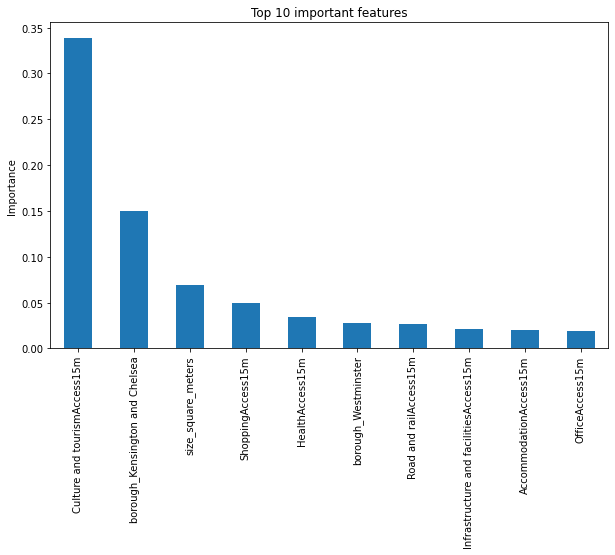

In [70]:
import matplotlib.pyplot as plt

# Select the top 10 features
top_features = f_importances.head(10)

# Plot the feature importances
plt.figure(figsize=(10,6))
top_features.plot(kind='bar')
plt.title('Top 10 important features')
plt.ylabel('Importance')
plt.show()


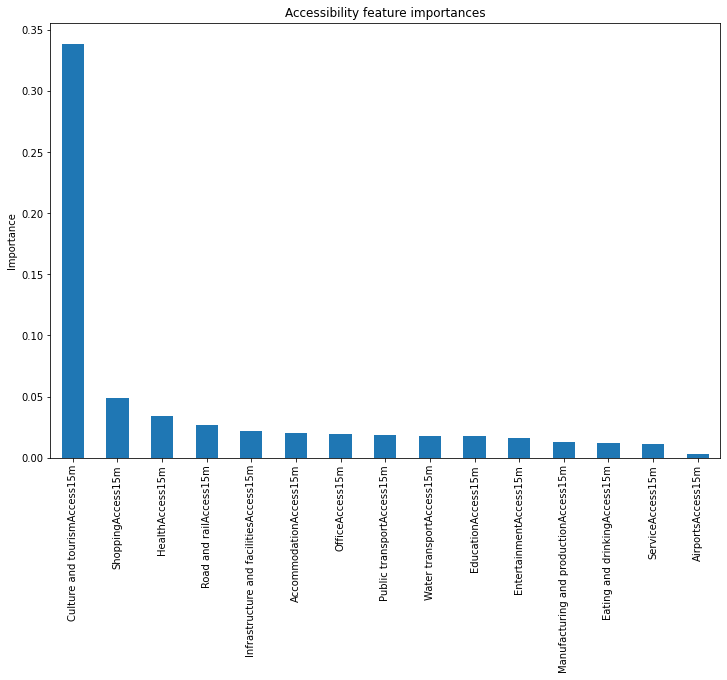

In [71]:
import matplotlib.pyplot as plt

# Filter out features that end with '15m'
accessibility_features = [feature for feature in f_importances.index if feature.endswith('15m')]

# Select these features
accessibility_importances = f_importances[accessibility_features]

# Sort the features by importance
accessibility_importances.sort_values(ascending=False, inplace=True)

# Plot the feature importances
plt.figure(figsize=(12,8))
accessibility_importances.plot(kind='bar')
plt.title('Accessibility feature importances')
plt.ylabel('Importance')
plt.show()


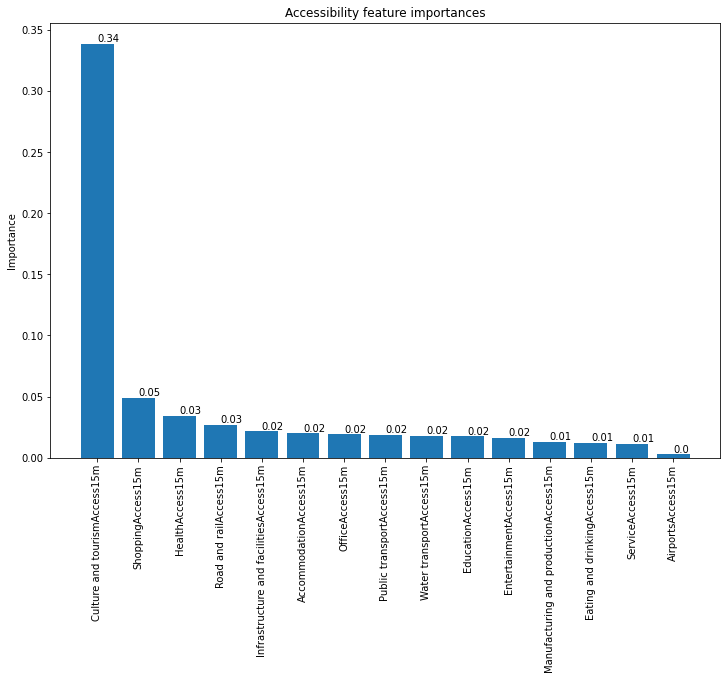

In [72]:
import matplotlib.pyplot as plt

# Filter out features that end with '15m'
accessibility_features = [feature for feature in f_importances.index if feature.endswith('15m')]

# Select these features
accessibility_importances = f_importances[accessibility_features]

# Sort the features by importance
accessibility_importances.sort_values(ascending=False, inplace=True)

# Plot the feature importances
plt.figure(figsize=(12,8))
bars = plt.bar(accessibility_importances.index, accessibility_importances.values)
plt.title('Accessibility feature importances')
plt.ylabel('Importance')

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

# Rotate the x-axis labels
plt.xticks(rotation='vertical')

plt.show()


那么这个随机森林回归模型能说明各类型可达性对房价的影响吗？

ChatGPT

随机森林模型可以给出各个特征的重要性，这可以被解释为该特征在预测房价上的贡献大小。一个特征的重要性越高，就意味着这个特征在模型的预测中起到的作用越大。

然而，特征重要性并不能直接告诉我们特征和目标变量之间的关系是正向还是反向，也不能告诉我们改变特征值会对目标变量产生多大的影响。这是因为随机森林是一个非参数模型，它并没有像线性回归模型那样的系数或斜率来直接描述特征和目标变量之间的关系。

对于理解特征如何影响随机森林模型的预测结果，一个常用的方法是绘制部分依赖图（Partial Dependence Plots）或个体条件期望图（Individual Conditional Expectation Plots）。这些工具可以帮助我们理解特定特征的变化如何影响模型的预测结果，即使这种影响是复杂和非线性的。

所以说，随机森林回归模型可以给我们一些关于各种类型可达性对房价影响的信息，但是这些信息可能需要通过其他工具和技术（如部分依赖图）来进一步解释和理解

----

检测数据集的Price_per_square_meter异常值


对文件 df_allrows = pd.read_csv(r"D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_hasId_accessibility.csv")

删除df['Price_per_square_meter'] >50000的两条异常值

"one-hot encoding"的技术来处理分类变量 'property_type', 'borough'

X = df_encoded.drop(['price', 'address', 
       'lat', 'lon', 'Price_per_square_meter', 'id',], axis=1)
y = df_encoded['Price_per_square_meter']

随机森林回归100树：R^2 score:   0.8030110472956721

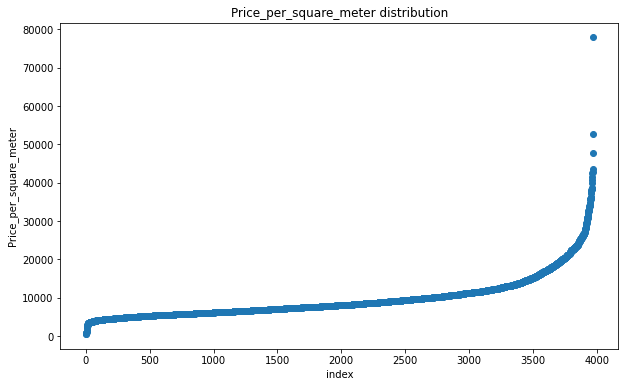

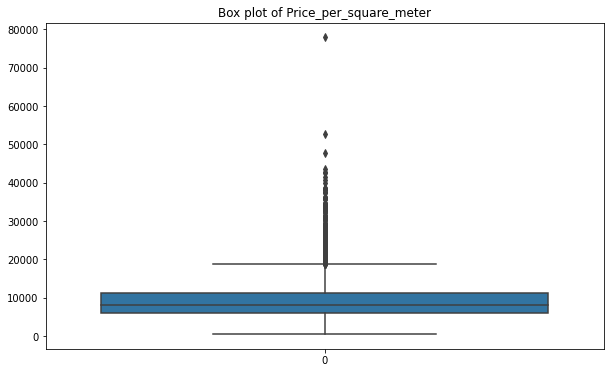

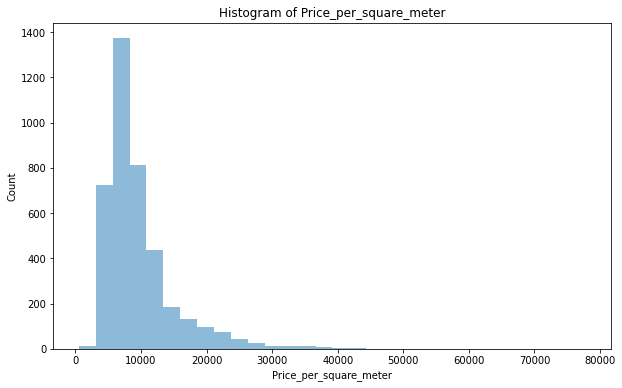

In [73]:


df = pd.read_csv(r"D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_hasId_accessibility.csv")

# Method 1: Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(df.shape[0]), np.sort(df['Price_per_square_meter'].values))
plt.xlabel('index')
plt.ylabel('Price_per_square_meter')
plt.title("Price_per_square_meter distribution")
plt.show()

# Method 2: Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(df['Price_per_square_meter'])
plt.title("Box plot of Price_per_square_meter")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['Price_per_square_meter'], bins=30, alpha=0.5)
plt.xlabel('Price_per_square_meter')
plt.ylabel('Count')
plt.title('Histogram of Price_per_square_meter')
plt.show()


In [74]:
# Rows where 'Price_per_square_meter' is greater than 30000
outliers_high = df[df['Price_per_square_meter'] > 50000]


# Display the outliers
print("High outliers:")
outliers_high


High outliers:


,price,address,property_type,bedrooms,bathrooms,size_square_meters,lat,lon,borough,Price_per_square_meter,...,EntertainmentAccess15m,HealthAccess15m,Infrastructure and facilitiesAccess15m,Manufacturing and productionAccess15m,OfficeAccess15m,Public transportAccess15m,Road and railAccess15m,ServiceAccess15m,ShoppingAccess15m,Water transportAccess15m
2115,24950000.0,"Kensington Palace Gardens, Kensington, W8",Flat,3,3,473,51.509643,-0.192573,Kensington and Chelsea,52748.414376,...,70,110,179,49,51,122,13,740,268,0
3952,14950000.0,"Marylebone Lane, London",Penthouse,3,3,192,51.518082,-0.150961,Westminster,77864.583333,...,70,624,164,140,95,96,14,1865,724,0


In [75]:
# Rows where 'Price_per_square_meter' is less than or equal to 50000
df = df[df['Price_per_square_meter'] <= 50000]


In [76]:
def RandomForestRegressorWithDummies(df):      
       # Perform one-hot encoding on the categorical variables
       df_encoded = pd.get_dummies(df, columns=['property_type', 'borough'])


       # Define predictors and target variable
       X = df_encoded.drop(['price', 'address', 
              'lat', 'lon', 'Price_per_square_meter', 'id',], axis=1)
       y = df_encoded['Price_per_square_meter']

       # Split data into train and test sets
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

       # Create a random forest regressor
       model = RandomForestRegressor(n_estimators=1000, random_state=42)

       # Train the model
       model.fit(X_train, y_train)

       # Make predictions
       y_pred = model.predict(X_test)

       # Print R^2 score
       print("R^2 score: ", r2_score(y_test, y_pred))
    

In [77]:
RandomForestRegressorWithDummies(df)

R^2 score:  0.8030110472956721


In [78]:
#df.to_csv(r"D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_accessibility_remove_outliers.csv")

---

绘制随机森林回归模型的验证曲线，展示了随机森林回归模型在不同树的数量n_estimators下的训练集和验证集性能。

In [17]:

df = pd.read_csv(r"D:\POI data\729_acc\729reclass3_add_distanceToCenter.csv")



df_encoded = pd.get_dummies(df, columns=['property_type', 'borough','tenure'])

X = df_encoded.drop(['price', 'address', 
        'lat', 'lon', 'Price_per_square_meter', 'id'], axis=1)
y = df_encoded['Price_per_square_meter']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


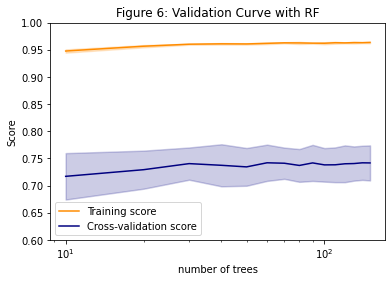

In [4]:

n_estimators_range = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

# plotting the validation curve
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Figure 6: Validation Curve with RF")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.6, 1.0)
lw = 1.5
plt.semilogx(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

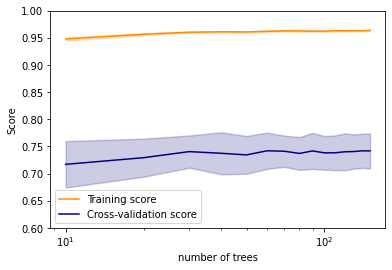

In [20]:

plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.6, 1.0)
lw = 1.5
plt.semilogx(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [18]:
# Set the display option
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

# Define the range of n_estimators values to try
n_estimators_range = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

# Initialize lists to store results
rmse_scores = []
r2_scores = []

# For each n_estimators value, compute the cross-validation average RMSE and R^2 Score
for n_estimators in n_estimators_range:
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=None, random_state=42)
    mse_score = -np.mean(cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    rmse_score = sqrt(mse_score)
    rmse_scores.append(rmse_score)
    
    rf_regressor.fit(X_train, y_train)
    r2_scores.append(r2_score(y_test, rf_regressor.predict(X_test)))

# Create a dictionary with n_estimators, rmse_scores, and r2_scores
results_dict = {'n_estimators': n_estimators_range,
                'rmse_scores': rmse_scores,
                'r2_scores': r2_scores}

# Create a pandas dataframe from the dictionary
results_df = pd.DataFrame(results_dict)

# Display the dataframe
results_df


,n_estimators,rmse_scores,r2_scores
0,10,2952.817,0.695
1,20,2842.770,0.723
2,30,2841.854,0.734
3,40,2834.679,0.737
4,50,2815.734,0.740
5,60,2811.835,0.737
6,70,2817.620,0.737
7,80,2813.111,0.736
8,90,2811.574,0.738
9,100,2810.812,0.738


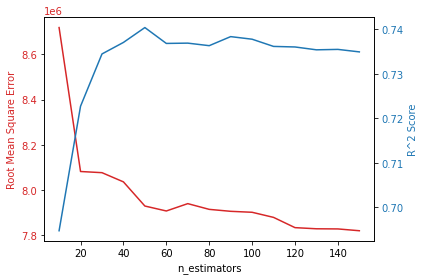

In [19]:

# 绘制折线图
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('Root Mean Square Error', color=color)
ax1.plot(n_estimators_range, mse_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('R^2 Score', color=color)
ax2.plot(n_estimators_range, r2_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


From the table, it can be observed that the RMSE decreases and the R^2 score increases as the number of trees (n_estimators) increases, up to a certain point. After this point, the improvements in RMSE and R^2 score become marginal.

The optimal value for n_estimators is the one that minimizes the RMSE and maximizes the R^2 score while avoiding unnecessary computational complexity. From the table, it appears that n_estimators = 50 provides a good balance. At this point, the RMSE is relatively low at 2815.734, and the R^2 score is relatively high at 0.740. Increasing n_estimators beyond 50 results in only marginal improvements in RMSE and R^2 score, but at the cost of increased computational complexity.

Therefore, in the context of this dissertation, n_estimators = 50 is chosen as the optimal parameter for the Random Forest regression model. This choice is justified by the need to balance model performance (as indicated by RMSE and R^2 score) and computational efficiency.

With this optimal parameter, the Random Forest model is expected to provide accurate and reliable predictions of property prices, thereby contributing to the robustness of the findings in this dissertation.

In [5]:
# 定义需要尝试的 n_estimators 值
n_estimators_range = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

# 初始化列表以存储结果
mse_scores = []
r2_scores = []

# 对于每个 n_estimators 值，计算交叉验证的平均 MSE 和 R^2 Score
for n_estimators in n_estimators_range:
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=None, random_state=42)
    mse_scores.append(-np.mean(cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))
    
    rf_regressor.fit(X_train, y_train)
    r2_scores.append(r2_score(y_test, rf_regressor.predict(X_test)))

# create a dictionary with n_estimators, mse_scores, and r2_scores
results_dict = {'n_estimators': n_estimators_range,
                'mse_scores': mse_scores,
                'r2_scores': r2_scores}

# create a pandas dataframe from the dictionary
results_df = pd.DataFrame(results_dict)

# display the dataframe
results_df


,n_estimators,mse_scores,r2_scores
0,10,8.719129e+06,0.694776
1,20,8.081341e+06,0.722729
2,30,8.076135e+06,0.734469
3,40,8.035404e+06,0.737055
4,50,7.928357e+06,0.740394
5,60,7.906416e+06,0.736831
6,70,7.938983e+06,0.736898
7,80,7.913594e+06,0.736327
8,90,7.904946e+06,0.738360
9,100,7.900664e+06,0.737778


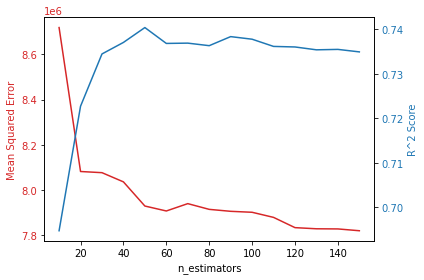

In [6]:

# 绘制折线图
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(n_estimators_range, mse_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('R^2 Score', color=color)
ax2.plot(n_estimators_range, r2_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

总之，根据提供的数据并考虑复杂性和性能之间的权衡，n_estimators 的值约为 90 到 110 似乎是一个合理的选择。 但是，进行交叉验证或超参数搜索技术可以让您对最终选择更有信心。 永远记住，最佳值可能会根据特定的数据集和问题而有所不同，因此实验和验证至关重要。

获得最佳的 n_estimators=50 值后重新训练RandomForestRegressor 模型

Mean Squared Error: 5354845.879931305
R^2 Score: 0.8227049269545825

用之前的随机森林训练代码，random_state=42

R^2 score:  0.7210537675096429

Mean Squared Error: 7519870.769502744

RMSE:  2742.2382773024565

In [16]:
model = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print R^2 score
print("R^2 score: ", r2_score(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print('RMSE: ', rmse)


# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE: ', f"{mape:.2f}%")

R^2 score:  0.7403942648080064
Mean Squared Error: 7716565.192214048
RMSE:  2777.8706219358105
MAPE:  18.23%


尝试更大的n_estimators

In [9]:
# # 定义需要尝试的 n_estimators 值
# n_estimators_range = [100,200,300,400,500,600,700,800,900,1000]

# # 初始化列表以存储结果
# mse_scores = []
# r2_scores = []

# # 对于每个 n_estimators 值，计算交叉验证的平均 MSE 和 R^2 Score
# for n_estimators in n_estimators_range:
#     rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=None, random_state=42)
#     mse_scores.append(-np.mean(cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))
    
#     rf_regressor.fit(X_train, y_train)
#     r2_scores.append(r2_score(y_test, rf_regressor.predict(X_test)))

# # create a dictionary with n_estimators, mse_scores, and r2_scores
# results_dict = {'n_estimators': n_estimators_range,
#                 'mse_scores': mse_scores,
#                 'r2_scores': r2_scores}

# # create a pandas dataframe from the dictionary
# results_df = pd.DataFrame(results_dict)

# # display the dataframe
# results_df

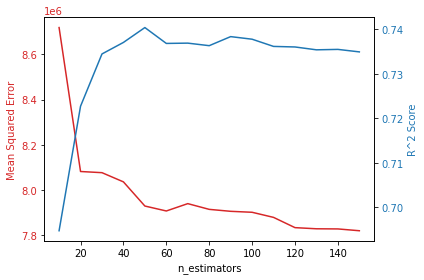

In [10]:

# 绘制折线图
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(n_estimators_range, mse_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('R^2 Score', color=color)
ax2.plot(n_estimators_range, r2_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

合并可达性列之后做随机森林

对文件 df = pd.read_csv(r"D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_accessibility_remove_outliers.csv")

合并相关列


"one-hot encoding"的技术来处理分类变量 'property_type', 'borough'

X = df_encoded.drop(['price', 'address', 
       'lat', 'lon', 'Price_per_square_meter', 'id',], axis=1)
y = df_encoded['Price_per_square_meter']

随机森林回归100树：R^2 score:   0.8011748648051799 小于合并之前

In [11]:
df = pd.read_csv(r"D:\s-casa毕业论文-工程\R5R_TEST1_london\Test2_onmypoi_data\mergeResult\housing_accessibility_remove_outliers.csv")


# 首先，我们合并相关列
df['Public transportAccess15m'] = df[['Water transportAccess15m', 'Public transportAccess15m', 'AirportsAccess15m']].sum(axis=1)
df['Culture and tourism and EntertainmentAccess15m'] = df[['Culture and tourismAccess15m', 'EntertainmentAccess15m']].sum(axis=1)
df['OfficeAccess15m'] = df[['Manufacturing and productionAccess15m', 'OfficeAccess15m']].sum(axis=1)

# 然后我们创建一个新的特征列表
new_features = ['bedrooms', 'bathrooms', 'size_square_meters', 
                'AccommodationAccess15m', 
                'Culture and tourism and EntertainmentAccess15m', 
                'Public transportAccess15m', 
                'OfficeAccess15m', 
                'Eating and drinkingAccess15m',
                'EducationAccess15m', 
                'HealthAccess15m',
                'Infrastructure and facilitiesAccess15m',
                'ServiceAccess15m', 
                'ShoppingAccess15m','Road and railAccess15m']

In [12]:
RandomForestRegressorWithDummies(df)

NameError: name 'RandomForestRegressorWithDummies' is not defined